# Example 1: Basics

Begin by importing AutoMPC.

In [1]:
import autompc as ampc
import numpy as np

Loading AutoMPC...
Finished loading AutoMPC


## Systems
Let's begin by showing how to define a System.  In AutoMPC, a System defines the variables of control and observation for a particular robot.  Here we define `simple_sys` which has to observation variables (x and y) and one control variable (u).  Optionally, the system can also include the time step at which is data is sampled for the system.  Here we define the time step as 0.05 s.

In [2]:
simple_sys = ampc.System(["x", "y"], ["u"], dt=0.05)

Given a system, we can access its properties as follows

In [3]:
print("Observation Dimension: ", simple_sys.obs_dim)
print("Observation Variables: ", simple_sys.observations)

print("Control Dimension: ", simple_sys.ctrl_dim)
print("Control Variables: ", simple_sys.controls)

Observation Dimension:  2
Observation Variables:  ['x', 'y']
Control Dimension:  1
Control Variables:  ['u']


## Trajectories
The Trajectory class stores a sequence of controls and observations.  Trajectories are defined with respect to a particular system.

Here we define a zero trajectory for `simple_sys` with 10 time steps.

In [4]:
traj = ampc.Trajectory.zeros(simple_sys, 10)

There are a couple different ways to set trajectory values.  We demonstrate a few below:

In [5]:
traj[0, "x"] = 1.0  # Set x to 1 at timestep 0
traj[1, "u"] = 2.0  # Set u to 2 at timestep 1
traj[2].obs[:] = np.array([3.0, 4.0])  # Set the observation (x and y) to [3,4] at timestep 2
traj[3].ctrl[:] = np.array([5.0])      # Set the control (u) to [5] at timestep 3

Similarly, there are a number of reading trajectory values.

In [6]:
print("Length of trajectory: ",len(traj))
print("Value of y at timestep 2: ", traj[2, "y"])
print("Observation at timestep 0: ", traj[0].obs)
print("Control at timestep 1: ", traj[1].ctrl)

Length of trajectory:  10
Value of y at timestep 2:  4.0
Observation at timestep 0:  [1. 0.]
Control at timestep 1:  [2.]


We can also access the entire set of observations and controls for a trajectory as numpy arrays:

In [7]:
print("Observations")
print("------------")
print(traj.obs)

print("")
print("Controls")
print("--------")
print(traj.ctrls)

Observations
------------
[[1. 0.]
 [0. 0.]
 [3. 4.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

Controls
--------
[[0.]
 [2.]
 [0.]
 [5.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Plotting trajectories

We have a couple of convenience functions for plotting trajectories in the `autompc.graphs` module.  `plot_traj` plots a single trajectory on a time axis.  `plot_traj_projected` plots the projection of 2 of the trajectory's observations on the X-Y plane.

/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py:119: PkgResourcesDeprecationWarning: 0.14ubuntu0.2 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


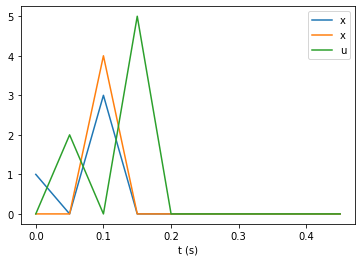

In [8]:
%matplotlib inline
from autompc.graphs import plot_traj,plot_traj_projected
import matplotlib.pyplot as plt

plot_traj(traj)
plt.show()

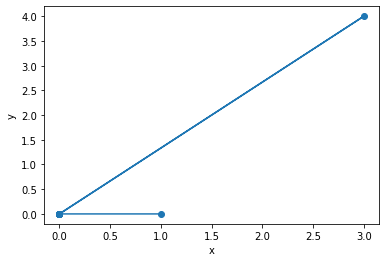

In [9]:
plot_traj_projected(traj, dimensions=[0,1])
plt.show()